In [18]:
import os

# Get all files stored inside data directory
fileLists = os.listdir('data')

for file in fileLists:
    print(file) 

combats.csv
tests.csv
poke_type_chart.csv
pokedex.csv


In [19]:
import pandas as pnd

# Deactivate the maximum number of DataFrame columns to be display
pnd.set_option('display.max_columns', None)

# Load pokemons'dara inside a Dataframe named ourPokemons
ourPokemons = pnd.read_csv('data/pokedex.csv')

# Show Dataframes'columns
# |---------------------------------------------------------------------------------------------------|
# | Column                    |            Meaning                                                    |
# |---------------------------------------------------------------------------------------------------|
# | NUMERO                    |   Id of the pokemon                                                   |
# | NOM                       |   Pokemon's name                                                      |
# | TYPE_1                    |   Primary type (Grass, Fire, Steel, ...)                              |
# | TYPE_2                    |   Secondary type (Grass, Fire, Steel, ...)                            |
# | POINT_DE_VIE              |   Life of the pokemon                                                 |
# | NIVEAU_ATTAQUE            |   The Pokemon's attack level                                          |
# | NIVEAU_DEFENSE            |   The Pokemon's defense level                                         |
# | NIVEAU_ATTAQUE_SPECIALE   |   Pokemon's special attack level                                      |
# | NIVEAU_DEFENSE_SPECIALE   |   Pokemon's special defense level                                     |
# | VITESSE                   |   Pokemon's speed                                                     |
# | GENERATION                |   Generation number to which Pokemon belongs                          |
# | LEGENDAIRE                |   Is the Pokémon legendary? This is a Boolean data (True or False)    |
# |---------------------------------------------------------------------------------------------------|
print(ourPokemons.columns.values)

# Display the first 10 lines inside the Dataframe
print(ourPokemons.head(10))


['NUMERO' 'NOM' 'TYPE_1' 'TYPE_2' 'POINTS_DE_VIE' 'NIVEAU_ATTAQUE'
 'NIVEAU_DEFENSE' ' NIVEAU_ATTAQUE_SPECIALE' 'NIVEAU_DEFENSE_SPECIALE'
 'VITESSE' 'GENERATION' 'LEGENDAIRE']
   NUMERO               NOM TYPE_1  TYPE_2  POINTS_DE_VIE  NIVEAU_ATTAQUE  \
0       1         Bulbasaur  Grass  Poison             45              49   
1       2           Ivysaur  Grass  Poison             60              62   
2       3          Venusaur  Grass  Poison             80              82   
3       4     Mega Venusaur  Grass  Poison             80             100   
4       5        Charmander   Fire     NaN             39              52   
5       6        Charmeleon   Fire     NaN             58              64   
6       7         Charizard   Fire  Flying             78              84   
7       8  Mega Charizard X   Fire  Dragon             78             130   
8       9  Mega Charizard Y   Fire  Flying             78             104   
9      10          Squirtle  Water     NaN            

In [20]:
# Transforming the LEGENDARY column into an integer 0=FALSE and 1=TRUE
ourPokemons['LEGENDAIRE'] = (ourPokemons['LEGENDAIRE'] == 'VRAI').astype(int)

print(ourPokemons['LEGENDAIRE'].head(100))

# Counting the number of observations and features
print(ourPokemons.shape)

# Information about our datasets
print(ourPokemons.info())

# Search the line which contains a null value (Name)
print(ourPokemons[ourPokemons['NOM'].isnull()])

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: LEGENDAIRE, Length: 100, dtype: int64
(800, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   NUMERO                    800 non-null    int64 
 1   NOM                       800 non-null    object
 2   TYPE_1                    800 non-null    object
 3   TYPE_2                    414 non-null    object
 4   POINTS_DE_VIE             800 non-null    int64 
 5   NIVEAU_ATTAQUE            800 non-null    int64 
 6   NIVEAU_DEFENSE            800 non-null    int64 
 7    NIVEAU_ATTAQUE_SPECIALE  800 non-null    int64 
 8   NIVEAU_DEFENSE_SPECIALE   800 non-null    int64 
 9   VITESSE                   800 non-null    int64 
 10  GENERATION                800 non-null    int64 
 11  LEGENDAIRE                800 non-null    int6

In [21]:
# Load combats.csv file
fighting = pnd.read_csv('data/combats.csv')

# Show features
print(fighting.columns.values)

# Show first 10 lines inside the dataframe
print(fighting.head(10))

# Count lines and column numbers
print(fighting.shape)

# Information about our dataset
print(fighting.info())

['POKEMON_PREMIER' 'POKEMON_SECOND' 'GAGNANT']
   POKEMON_PREMIER  POKEMON_SECOND  GAGNANT
0              266             298      298
1              702             701      701
2              191             668      668
3              237             683      683
4              151             231      151
5              657             752      657
6              192             134      134
7               73             545      545
8              220             763      763
9              302              31       31
(50000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   POKEMON_PREMIER  50000 non-null  int64
 1   POKEMON_SECOND   50000 non-null  int64
 2   GAGNANT          50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB
None


In [22]:
# When a grouping is performed using the groupBy () function, all the features in the dataset take on the value of this grouping.
# Features in the dataset take on the value of this grouping.
# This is why the features SECOND_POKEMON and POKEMON WINNER have the same value
nbPokemonOnFirstPosition = fighting.groupby('POKEMON_PREMIER').count()
nbPokemonOnSecondPosition = fighting.groupby('POKEMON_SECOND').count()
nbTotalFightPerPokemon = nbPokemonOnFirstPosition + nbPokemonOnSecondPosition

nbWin = fighting.groupby('GAGNANT').count()
print(nbWin)

         POKEMON_PREMIER  POKEMON_SECOND
GAGNANT                                 
1                     37              37
2                     46              46
3                     89              89
4                     70              70
5                     55              55
...                  ...             ...
796                   39              39
797                  116             116
798                   60              60
799                   89              89
800                   75              75

[783 rows x 2 columns]


In [23]:
#We create a list from an extraction to obtain the list of list of Pokémons, sorted by number
#This list of numbers will enable us to aggregate the data
listToBeAggregated = fighting.groupby('GAGNANT').count()
listToBeAggregated.sort_index()

# We add the number of fights
listToBeAggregated['NBR_COMBATS'] = nbPokemonOnFirstPosition.GAGNANT + nbPokemonOnSecondPosition.GAGNANT

# We add the number of wins
listToBeAggregated['NBR_VICTOIRES'] = nbWin.POKEMON_PREMIER

# We calculate the percentage of wins
listToBeAggregated['POURCENTAGE_DE_VICTOIRES'] = nbWin.POKEMON_PREMIER / (nbPokemonOnFirstPosition.GAGNANT + nbPokemonOnSecondPosition.GAGNANT)

newPokedex = ourPokemons.merge(listToBeAggregated, left_on='NUMERO', right_index=True, how='left')

print(newPokedex)

     NUMERO             NOM   TYPE_1  TYPE_2  POINTS_DE_VIE  NIVEAU_ATTAQUE  \
0         1       Bulbasaur    Grass  Poison             45              49   
1         2         Ivysaur    Grass  Poison             60              62   
2         3        Venusaur    Grass  Poison             80              82   
3         4   Mega Venusaur    Grass  Poison             80             100   
4         5      Charmander     Fire     NaN             39              52   
..      ...             ...      ...     ...            ...             ...   
795     796         Diancie     Rock   Fairy             50             100   
796     797    Mega Diancie     Rock   Fairy             50             160   
797     798  Hoopa Confined  Psychic   Ghost             80             110   
798     799   Hoopa Unbound  Psychic    Dark             80             160   
799     800       Volcanion     Fire   Water             80             110   

     NIVEAU_DEFENSE   NIVEAU_ATTAQUE_SPECIALE  NIVE

In [24]:
# Ecart-type (std = standard deviation)
# The standard deviation is a statistical value, used to show the distribution
# of the data around the mean.
print(newPokedex.describe())

         NUMERO  POINTS_DE_VIE  NIVEAU_ATTAQUE  NIVEAU_DEFENSE  \
count  800.0000     800.000000      800.000000      800.000000   
mean   400.5000      69.258750       79.001250       73.842500   
std    231.0844      25.534669       32.457366       31.183501   
min      1.0000       1.000000        5.000000        5.000000   
25%    200.7500      50.000000       55.000000       50.000000   
50%    400.5000      65.000000       75.000000       70.000000   
75%    600.2500      80.000000      100.000000       90.000000   
max    800.0000     255.000000      190.000000      230.000000   

        NIVEAU_ATTAQUE_SPECIALE  NIVEAU_DEFENSE_SPECIALE     VITESSE  \
count                800.000000               800.000000  800.000000   
mean                  72.820000                71.902500   68.277500   
std                   32.722294                27.828916   29.060474   
min                   10.000000                20.000000    5.000000   
25%                   49.750000              

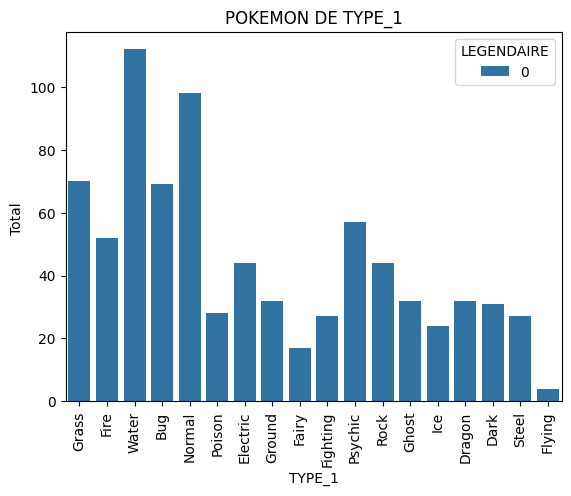

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

x_axis = sns.countplot(x="TYPE_1", hue="LEGENDAIRE", data=newPokedex)
plt.xticks(rotation=90)
plt.xlabel('TYPE_1')
plt.ylabel('Total ')
plt.title('POKEMON DE TYPE_1')
plt.show()

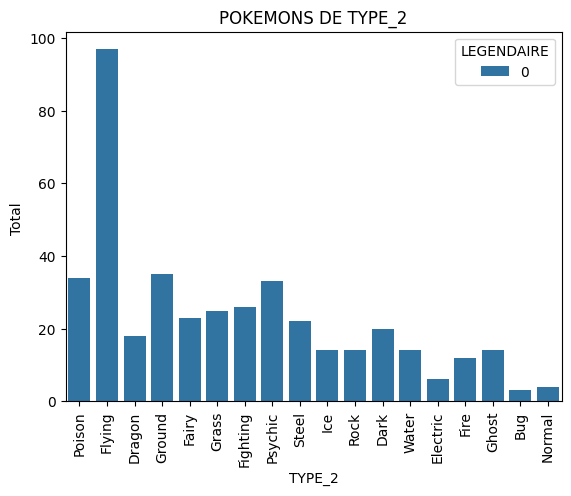

In [26]:
x_axis = sns.countplot(x='TYPE_2', hue='LEGENDAIRE', data=newPokedex)
plt.xticks(rotation=90)
plt.xlabel('TYPE_2')
plt.ylabel('Total ')
plt.title('POKEMONS DE TYPE_2')
plt.show()

In [27]:
print(newPokedex .groupby('TYPE_1').agg({ "POURCENTAGE_DE_VICTOIRES":"mean" }).sort_values(by="POURCENTAGE_DE_VICTOIRES"))

          POURCENTAGE_DE_VICTOIRES
TYPE_1                            
Fairy                     0.329300
Rock                      0.404852
Steel                     0.424529
Poison                    0.433262
Bug                       0.439006
Ice                       0.439604
Grass                     0.440364
Water                     0.469357
Fighting                  0.475616
Ghost                     0.484027
Normal                    0.535578
Ground                    0.541526
Psychic                   0.545747
Fire                      0.579215
Dark                      0.629726
Electric                  0.632861
Dragon                    0.633587
Flying                    0.765061


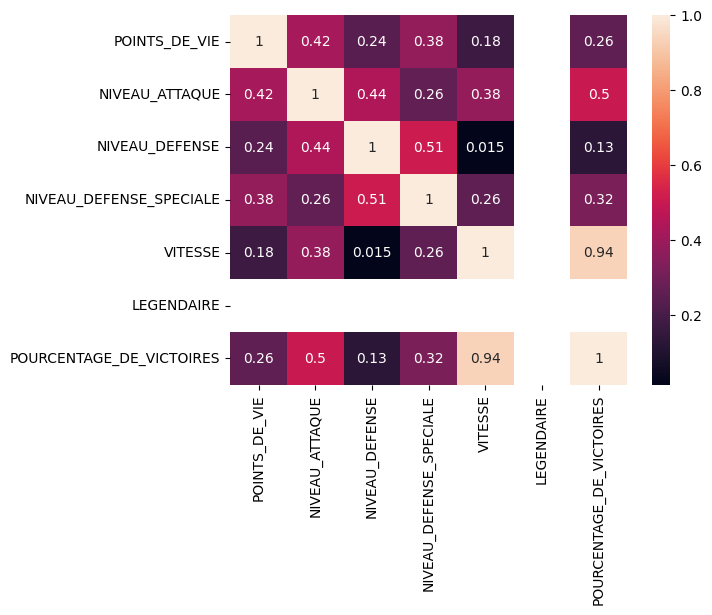

In [40]:
# Data correlation
corr = newPokedex.loc[:,['POINTS_DE_VIE', 'NIVEAU_ATTAQUE', 'NIVEAU_DEFENSE', 'NIVEAU_ATTAQUE_SPECIALE', 'NIVEAU_DEFENSE_SPECIALE', 'VITESSE', 'LEGENDAIRE', 'POURCENTAGE_DE_VICTOIRES']].corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()